<h1 align="center">Statistics for Machine Learning</h1>
<h2 align="center">Hierarchical Agglomerative Clustering</h2>

&nbsp;

### Overview

Hierarchical Agglomerative Clustering is a bottom-up, deterministic clustering technique which groups data by the similarity between points. Initially all points in a dataset are assigned to their own cluster, and at each stage the two most similar clusters are combined based on a linkage metric. These grouping decisions can be summarised graphically in a dendrogram, giving a view of the underlying hierarchical structure of the clusters. Unlike k-means, the number of clusters does not need to be specified up-front, which may be useful in higher dimensional cases where the number of clusters to create is unclear. Additionally, agglomerative methods can perform well with some non-convex cluster problems, which typically cannot be achieved with centroid-based clustering methods. However agglomerative clustering is computationally expensive when compared to other methods such as k-means, and has a time complexity of $O(n^3)$. This notebook covers the theory behind agglomerative and hierarchical clustering methods, as well as the various linkage methods. These are shown both mathematically and graphically through a Python implementation.

### Pre-requisites

This notebook builds on the ideas of clustering introduce in *k-Means Clustering*.

### Contents

Section 1 - Introduction to Hierarchical Clustering

Section 2 - The Agglomerative Clustering Method

Section 3 - Dendrograms

Section 4 - SciKit Learn Implementation

Section 5 - Conclusion

Section 6 - Glossary

Section 7 - Further Reading

### Imports

In [4]:
import matplotlib as mpl
from matplotlib import cm
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression

mpl.rcParams['figure.dpi']= 90

<h2 align="center">Section 1 - Introduction to Hierarchical Clustering</h2>

### 1.1 - Overview of Hierarchical Models

As briefly described in the notebook *k-Means Clustering*, hierarchical clustering is one of the major types of clustering models. These models are separate from centroid-based models such as k-means, and density-based models such as DBSCAN. Hierarchical models were the first types of clustering models to be developed, and were written by evolutionary biologists to aid with taxonomy (the classification of species). In this application, it is important that the method be deterministic: monkeys cannot be classified as primates in one run and as reptiles in another. This made necessary a method which was repeatable, and could be easily inspected to view the hierarchical relation between the clusters. From these requirements came the **dendrogram**, a graphical representation of the similarity of points in a dataset. Dendrograms as explored in more detail later in this notebook.

&nbsp;

### 1.2 - Types of Hierarchical Clustering

Hierarchical clustering establishes clusters using the similarity of points in a hierarchical structure. This can be in the form of a bottom-up approach, or a top-down approach, called **agglomerative** and **divisive** clustering respectively. Definitions of these terms are given below, and more on this topic can be found here [1].

**Agglomerative Clustering:**

The bottom-up approach starts by assigning each data point to its own cluster. The similarity between each point and every other point is then calculated using the Euclidean distance, then assessed according to a linkage metric to determine which clusters should be combined. This process is repeated iteratively until the desired number of clusters are left, or until all the points are grouped into a single cluster. This is the hierarchical approach that is most-commonly applied, and is the method used in this notebook.

**Divisive Clustering**

The top-down approach starts by assigning all the data to a single cluster. The points are then recursively separated from each other to form larger numbers of smaller clusters. The sum of squared errors for each cluster (variability) is found, and the cluster with the highest error is split. This is known as Ward's criterion, and aims to minimise the total variability.

&nbsp;



### 1.3 - Flat vs Hierarchical Clustering

k-Means clustering is a **flat** clustering method, that is to say, the clusters produced do not have any explicit underlying structure which defines how the clusters relate to each other. Hierarchical clustering methods are **hierarchical** (hence the name), because the clusters produced do have an underlying structure. Flat vs hierarchical is just one attribute of a clustering method. Recall in the notebook *k-Means Clustering* the terms *hard* and *soft*. Since agglomerative clustering only assigns each point to a single cluster, it is also a *hard* clustering method.

&nbsp;

<h2 align="center">Section 2 - The Agglomerative Clustering Method</h2>

### 2.1 - Overview of Agglomerative Clustering

Agglomerative clustering is a greedy, deterministic, hard, bottom-up, hierarchical clustering method which groups data into clusters based on the similarity between points. Each cluster initially contains a single point, and the most similar are iteratively merged until the desired number of clusters is reached or all the points are combined into a single cluster. There are various methods for determining how similar two clusters are: these are called **linkage metrics** and are described below. Because agglomerative clustering is deterministic, the history of each merge will be identical every time for the same data.

&nbsp;

### 2.2 - Agglomerative Clustering Algorithm

Agglomerative clustering (also known as agglomerative nesting, AGNES) begins with creating a single-element cluster for each data point, called a **leaf**. The leaves are combined into larger clusters called **nodes** until the desired number of clusters has been reached, or all data points are collected in the same cluster (called the **root**).

* Step 1) Assign each point to its own cluster called a leaf, for $n$ points there should be $n$ clusters
* Step 2) Calculate the similarity between each cluster and every other cluster
* Step 3) Combine the two most similar clusters into a node, reducing the total number of clusters by 1
* Step 4) Repeat steps 2 and 3 until the desired number of clusters are reached, or all the points are contained in a single cluster

Like k-means, agglomerative clustering will pursue locally optimal solutions at each step, and so is a greedy algorithm. To calculate the similarity between clusters, the pairwise Euclidean distance between points in each cluster and every other cluster must be found. For $n$ points, this is $n \times n$ calculations for each step. To combine all the points into a single cluster (a good approximation if $n$ is much larger than the number of clusters), $n-1$ iterations are required. This approximately gives $O(n^3)$ time complexity. For more information on the algorithm itself see [2].

&nbsp;

### 2.3 - Linkage Metrics

A linkage metric defines how the dissimilarity between clusters is measured, and is a parameter chosen by the user. These metrics are broken into two categories: centroid-based approaches, and non-centroid based approaches. The centroid-based approaches require calculating the centroid of each cluster, and using this to determine the dissimilarity between them. The non-centroid approaches instead calculate the pairwise distance between each point in one cluster and every other point in another cluster, then apply an aggregation function (e.g. min, max, avg) to determine the dissimilarity. The following five most commonly used metrics are explained below:

* Single linkage
* Complete linkage
* Average linkage
* Centroid linkage
* Ward's linkage

&nbsp;

**Single Linkage:**

The single linkage metric is a non-centroid based approach. The pairwise distance between each combination of points across clusters is calculated, and the cluster dissimilarity is then defined by the minimum inter-cluster distance. The two clusters with the shortest closest distance (lowest dissimilarity) are considered the most similar and therefore are combined. The single linkage metric is perhaps the most useful linkage metric for agglomerative clustering, as it detailed later in this section.

&nbsp;

**Complete Linkage:**

The complete linkage metric is also a non-centroid based approach, and calculates the pairwise distance between each combination of points across clusters. This time however the dissimilarity is given by the maximum inter-cluster distance. The two clusters with the shortest maximum difference are the most similar, and so are merged.

&nbsp;

**Average Linkage:**

In a similar way to the above two metrics, the average linkage metric is a non-centroid based approach and applies an aggregation function to the pairwise distances between clusters. Instead of taking the minimum (like in single linkage) or the maximum (like in complete linkage), the average is taken. The two clusters with the shortest average difference (lowest dissimilarity) are considered the most similar and so are merged.

&nbsp;

**Centroid Linkage:**

The centroid linkage is the first of the centroid-based metrics detailed in this section. In this metric, the dissimilarity between clusters is determined by finding the centroid of each cluster, then finding the Euclidean distance between them. The two clusters with the shortest inter-centroid distance have the lowest dissimilarity and so are merged. The coordinates of the centroid for a cluster $C_i$ can be found by calculating the mean coordinates of all the points in a cluster: 

&nbsp;

$\begin{align}
C_i = ( \mu_1, \mu_2, ..., \mu_d )
\end{align}$

&nbsp;

where $d$ is the number of spatial dimensions.

&nbsp;

**Ward's Linkage:**

Ward's linkage is another centroid-based approach, and as such first requires calculating the centroid, $c$, for each cluster. Instead of then using these to find the Euclidean distance between the centers of clusters, they are used to calculate the variability of each cluster. Recall that the variability of a cluster is equal to the sum of the squared distances between each point in a cluster and its centroid:

&nbsp;

$\begin{align}
\text{variability}(c) = \sum_{i=1}^{n} \lVert{x_{i}-c}\rVert^2
\end{align}$

&nbsp;

where $x$ is one of $n$, $d$-dimensional data points in the cluster. Once the variability is found for each cluster, the variability of the two clusters combined can then be found. The difference between the combined cluster variability and the sum of the individual cluster variabilities gives the increase in variability observed if the two clusters were combined:

&nbsp;

$\begin{align}
\text{increase in variability} = \text{variability}(c_{1+2}) - (\text{variability}(c_{1}) + \text{variability}(c_{2}))
\end{align}$

$\begin{align}
= \sum_{i=1}^{n_1 + n_2} \lVert{x_{i}-c_{1+2}}\rVert^2 - \Bigg(\sum_{i=1}^{n_1} \lVert{x_{i}-c_{1}}\rVert^2 + \sum_{i=1}^{n_2} \lVert{x_{i}-c_{2}}\rVert^2)\Bigg)
\end{align}$


&nbsp;

The combination of clusters which gives the lowest increase in variability is used to determine which two clusters to combine.

&nbsp;

### 2.4 - Visualising the Linkage Metrics

It can be helpful to visualise some of the metrics to get an intuition for how they define similarity between clusters. The plots below show the single, complete and centroid linkage for the points in two clusters. The single linkage shows the distance used to determine the dissimilarity between the two clusters in green, which is the smallest pairwise distance between the two. Similarly, the complete linkage plot shows the largest distance in red which is used to determine the dissimilarity between the clusters. Finally the centroid linkage plot shows the centroid for each cluster with a cross, and the line connecting them as the inter-centroid distance. The average linkage and Ward's linkage metrics have not been shown since these do not lend themselves as well to visualisation.

In [74]:
cluster_1 = np.asarray([(3,7), (4,5), (6,6.5)])
cluster_2 = np.asarray([ (12,8), (14,9), (16,7)])

dists = []

for i, c1 in enumerate(cluster_1):
    for j, c2 in enumerate(cluster_2):
        dist = np.sqrt( (c1[0]-c2[0])**2 + (c1[1]-c2[1])**2 )
        dists.append(dist)
        print(f'C1 point {i} to C2 point {j}: {dist:.2f}')

C1 point 0 to C2 point 0: 9.06
C1 point 0 to C2 point 1: 11.18
C1 point 0 to C2 point 2: 13.00
C1 point 1 to C2 point 0: 8.54
C1 point 1 to C2 point 1: 10.77
C1 point 1 to C2 point 2: 12.17
C1 point 2 to C2 point 0: 6.18
C1 point 2 to C2 point 1: 8.38
C1 point 2 to C2 point 2: 10.01


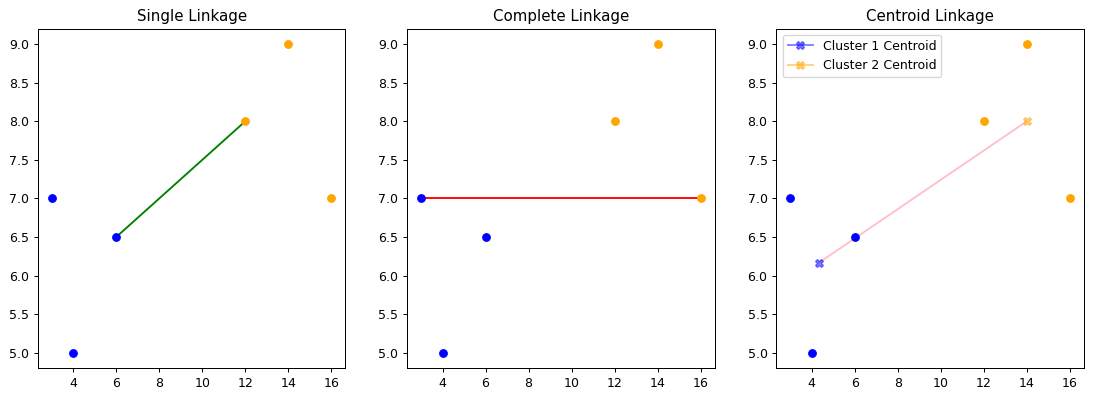

In [75]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

# Single linkage
ax[0].set_title('Single Linkage')
ax[0].plot([cluster_1[2][0], cluster_2[0][0]], [cluster_1[2][1], cluster_2[0][1]], c='green', 
            zorder=0)

# Complete linkage
ax[1].set_title('Complete Linkage')
ax[1].plot([cluster_1[0][0], cluster_2[2][0]], [cluster_1[0][1], cluster_2[2][1]], c='red', 
            zorder=0)

# Centroid linkage
centroid_1 = np.mean(cluster_1, axis=0)
centroid_2 = np.mean(cluster_2, axis=0)
ax[2].set_title('Centroid Linkage')
ax[2].plot(centroid_1[0], centroid_1[1], marker='X', c='blue', alpha=0.5,
           label='Cluster 1 Centroid')
ax[2].plot(centroid_2[0], centroid_2[1], marker='X', c='orange', alpha=0.5,
           label='Cluster 2 Centroid')
ax[2].plot([centroid_1[0], centroid_2[0]], [centroid_1[1], centroid_2[1]], c='pink', zorder=0)
ax[2].legend()

for i in range(3):
    ax[i].scatter(cluster_1[:,0], cluster_1[:,1], c='blue')
    ax[i].scatter(cluster_2[:,0], cluster_2[:,1], c='orange')

### 2.5 - Single Linkage Method in Non-Convex Cluster Problems

Non-convex clusters are groups of points such that if any two points are chosen at random, a straight line can be draw between them, and the line will lie entirely within the group. Essentially, convex clusters are blobs which are roughly circular in shape with no major irregularities. A non-convex cluster is the opposite, and so can be highly irregular in shape. Later examples of this use concentric circles and moon shapes as non-convex clusters.

Centroid-based clustering algorithms, such k-means, struggle with datasets like these since the centroid of a group of points will move across the void of points in the middle of the circle for example, and lie outside the region of points it is clustering. For the same reason, the Ward's and centroid linkage metrics also struggle to cluster datasets such as this. The single linkage metric however defines dissimilarity based on the closest point, and so there is no centroid to move away from the points in a cluster. This allows the cluster to expand around the circumference of circular-structured data easily. Later in this section, an agglomerative clustering algorithm is given different dataset sets with non-convex clusters, and is applied with different linkage metrics to observe their performance. Of these, only the single linkage metric is able to correctly cluster the points. This highlights the importance of choosing the correct algorithm for the dataset being worked with. Though the single linkage metric is able to successfully cluster the circle dataset, the same model is not able to cluster the moon dataset. This is because the shortest distance in the dataset may be between two points from different clusters, even if humans can tell those points do not belong together. For algorithms more robust to these sorts of problems, see the notebook *DBSCAN Clustering*.

&nbsp;

### 2.6 - Creating a Python Implementation of Hierarchical Agglomerative Clustering

Below is a Python implementation of hierarchical agglomerative clustering, which can be optionally initialised with the number of clusters to produce, `n_clusters` and the linkage metric `linkage`. The linkage metrics available include `single`, `complete`, `average` and `centroid`. Once instantiated, an object of this class can be fit to data in the form of a NumPy ndarray using the `fit` method. The data structure should consist of $n$ elements representing each data point, with each point itself being an ndarray with $d$ elements containing the coordinates (values of the features) of the point. Clustering techniques are not used for classification, and as such there is no predict method for this class. The same decision to omit a prediction method was made by the authors of the `AgglomerativeClustering` class at SciKit Learn. To implement a prediction capability, a supervised learning method such as k-nearest neighbors could be applied (as implemented in the *k-Means Clustering* notebook), however this would not integrate the new data point into the hierarchical strucutre.

In [76]:
class HierarchicalClustering:

    ''' An implementation of hierarchical agglomerative clustering.

        Attributes:
            n_clusters (int, optional):   The number of clusters to produce to use, defaults to 1.
            linkage (function):           The class method for the linkage metric used to determine
                                          the similarity of clusters.
            data (ndarray):               Points in the feature space to be clustered. These are
                                          supplied using the fit method.
            clusters (dict):              A dictionary storing the clusters where the key is the
                                          cluster ID (int) and the value is a list of the points
                                          in the cluster.
            all_clusters (list):          An accumulative history of all clusters dictionaries,
                                          used to plot the clustering at each iteration.
            linkage_name (str):           The name of the linkage method, used to title graphs.
            history (list):               A list of strings storing the merging decision in each
                                          iteration of the clustering process.
    '''

    def __init__(self, n_clusters=1, linkage='centroid'):

        linkages = {'centroid': self.centroid_linkage,
                   'single': self.single_linkage,
                   'complete': self.complete_linkage,
                   'average': self.average_linkage}

        self.n_clusters = n_clusters
        self.linkage = linkages[linkage]
        self.data = None
        self.clusters = None
        self.all_clusters = []
        self.linkage_name = linkage
        self.history = []

    def fit(self, data):
        ''' Fit the model to the training data.

            Create a cluster for each point and iteratively combine (agglomerate) clusters together
            based on the linkage method. Combine the two closest clusters in each iteration until
            the desired number of clusters is reached (as given by n_clusters), or all the points
            are combined into a single cluster. Store the history of each cluster in
            self.all_clusters, so that plots and dendrograms can be constructed.

            Args:
                data (ndarray): The training data, containing n list-like elements representing
                                each training point, each with d elements representing features.

            Returns:
                None
        '''
        self.data = data
        self.clusters = {i: point for i, point in enumerate(self.data)}
        self.all_clusters.append(self.clusters.copy())

        while len(self.clusters) > self.n_clusters:
            c1, c2 = self.get_closest_clusters()
            self.merge_clusters(c1, c2)
            self.all_clusters.append(self.clusters.copy())

    def get_closest_clusters(self):
        ''' Return the two closest clusters using the linkage specified in self.linkage.

            Calculate the Euclidean distance between each cluster and every other cluster using the
            linkage metric specified when instantiating the object. Return the two closest clusters,
            referenced using the key for each cluster in the self.clusters dictionary.

            Args:
                None

            Returns:
                clusters_to_merge (tuple): Two cluster IDs (both int) for the closest clusters. The
                                           IDs refer to the key of the cluster in the self.clusters
                                           dictionary.
        '''
        min_dist = None
        for c1 in self.clusters:
            c1_points = self.clusters[c1]
            for c2 in self.clusters:
                c2_points = self.clusters[c2]
                dist = self.linkage(c1_points, c2_points)
                if c1 != c2:
                    if min_dist is None or dist < min_dist:
                        min_dist = dist
                        clusters_to_merge = (c1, c2)
        
        return clusters_to_merge

    def euclidean_distance(self, p1, p2):
        dist = np.sqrt(sum([(p1[d] - p2[d])**2 for d in range(len(p1))]))
        return dist

    def centroid_linkage(self, c1_points, c2_points):
        ''' Calculate the distance between the centroid of two clusters. 

            Take in the points associated with two clusters and calculate the centroid for each.
            Return the Euclidean distance between the centroids. If a cluster is 1-dimensional, that
            is it contains only a single point, the coordinates of the centroid are simply the
            coordinates of the point. Otherwise, computer the mean value of the coordinates for each
            dimension.

            Args:
                c1_points (ndarray): The points associated with cluster 1. The array contains n 
                                     ndarray elements each representing a point, each with d
                                     elements representing the coordinates of the point.
                c2_points (ndarray): See above, for points associated with cluster 2.

            Returns:
                dist (float): The Euclidean distance between the centroids of the two clusters c1
                              and c2.
        '''
        if c1_points.ndim > 1:
            centroid_1 = [np.mean(c1_points[:,d]) for d in range(c1_points.ndim)]
        else:
            centroid_1 = c1_points

        if c2_points.ndim > 1:
            centroid_2 = [np.mean(c2_points[:,d]) for d in range(c2_points.ndim)]
        else:
            centroid_2 = c2_points

        dist = self.euclidean_distance(centroid_1, centroid_2)
        return dist

    def get_distances(self, c1_points, c2_points):
        ''' Return the Euclidean distance between each point in two clusters. 

            Calculate the distance between each point in a cluster and each point in a second
            cluster and return the list of distance values. This list can then be used by the
            linkage methods self.single_linkage, self.complete_linkage and self.average_linkage
            to find the aggregate distance metric between two clusters.

            Args:
                c1_points (ndarray): The points associated with cluster 1. The array contains n 
                                     ndarray elements each representing a point, each with d
                                     elements representing the coordinates of the point.
                c2_points (ndarray): See above, for points associated with cluster 2.

            Returns:
                dists (list): The Euclidean distances between the each point in the two clusters c1
                              and c2.
        '''
        if c1_points.ndim == 1:
                c1_points = [c1_points]
        if c2_points.ndim == 1:
            c2_points = [c2_points]

        dists = [[self.euclidean_distance(p1, p2) for p2 in c2_points] for p1 in c1_points]
        return dists

    def single_linkage(self, c1_points, c2_points):
        ''' Return the minimum distance between points in two clusters. 

            Call the self.get_distances method on the points for two clusters to find the distance
            between each point in one cluster and each point in the other cluster. Return the
            minimum distance between the clusters.

            Args:
                c1_points (ndarray): The points associated with cluster 1. The array contains n 
                                     ndarray elements each representing a point, each with d
                                     elements representing the coordinates of the point.
                c2_points (ndarray): See above, for points associated with cluster 2.

            Returns:
                min_dist (float): The minimum distance between points in two clusters.
        '''
        dists = self.get_distances(c1_points, c2_points)
        min_dist = min(dists)
        return min_dist

    def complete_linkage(self, c1_points, c2_points):
        ''' Return the maximum distance between points in two clusters. 

            Call the self.get_distances method on the points for two clusters to find the distance
            between each point in one cluster and each point in the other cluster. Return the
            maximum distance between the clusters.

            Args:
                c1_points (ndarray): The points associated with cluster 1. The array contains n 
                                     ndarray elements each representing a point, each with d
                                     elements representing the coordinates of the point.
                c2_points (ndarray): See above, for points associated with cluster 2.

            Returns:
                max_dist (float): The maximum distance between points in two clusters.
        '''
        dists = self.get_distances(c1_points, c2_points)
        max_dist = max(dists)
        return max_dist
        
    def average_linkage(self, c1_points, c2_points):
        ''' Return the average distance between points in two clusters. 

            Call the self.get_distances method on the points for two clusters to find the distance
            between each point in one cluster and each point in the other cluster. Return the
            average distance between the clusters.

            Args:
                c1_points (ndarray): The points associated with cluster 1. The array contains n 
                                     ndarray elements each representing a point, each with d
                                     elements representing the coordinates of the point.
                c2_points (ndarray): See above, for points associated with cluster 2.

            Returns:
                average_dist (float): The average distance between points in two clusters.
        '''
        dists = self.get_distances(c1_points, c2_points)
        average_dist = np.mean(dists)
        return average_dist
    
    def merge_clusters(self, c1, c2):
        ''' Merge two clusters together.

            Take in the identifiers for two clusters, c1 and c2. Combine the clusters by taking the
            points from c2 and adding the, to the points in c1. Finally, remove c2 from the list of
            existing clusters.

            Args:
                c1 (int): The key for the first cluster to merge in the self.clusters attribute.
                c2 (int): The key for the second cluster to merge in the self.clusters attribute.

            Returns:
                None
        '''
        self.history.append(f'Merged cluster {c1} with cluster {c2}')
        self.clusters[c1] = np.vstack([self.clusters[c1], self.clusters[c2]])
        del self.clusters[c2]

    def get_ellipse_params(self, points):
        ''' Calculate the parameters needed to graph an ellipse around a cluster of points in 2D.

            Calculate the height, width and angle of an ellipse to enclose the points in a cluster.
            Calculate the width by finding the maximum distance between the x-coordinates of points
            in the cluster, and the height by finding the maximum distance between the y-coordinates
            in the cluster. Multiple both by a scale factor to give padding around the points when
            constructing the ellipse. Calculate the angle by taking the inverse tangent of the
            gradient of the regression line. Note that tangent solutions repeat every 180 degrees,
            and so to ensure the correct solution has been found for plotting, add a correction
            factor of +/- 90 degrees if the magnitude of the angle exceeds 45 degrees. Finally, add
            minimum and maximum constraints on the widths and heights of the ellipse.

            Args:
                points (ndarray): The points in a cluster to enclose with an ellipse, containing n
                                  ndarray elements representing each point, each with d elements
                                  representing the coordinates for the point.

            Returns:
                width (float):  The width of the ellipse.
                height (float): The height of the ellipse.
                angle (float):  The angle of the ellipse in degrees.
        '''
        if points.ndim == 1:
            width, height, angle = 0.1, 0.1, 0
            return width, height, angle

        else:
            SCALE = 2.5
            width = np.amax(points[:,0]) - np.amin(points[:,0])
            height = np.amax(points[:,1]) - np.amin(points[:,1])
            
            # Calculate angle
            x_reg, y_reg = [[p[0]] for p in points], [[p[1]] for p in points]
            grad = LinearRegression().fit(x_reg, y_reg).coef_[0][0]
            angle = np.degrees(np.arctan(grad))

            # Account for multiple solutions of arctan
            if angle < -45: angle += 90
            elif angle > 45: angle -= 90

            if height >= 1: height = 0.6
            elif height < 0.05: height = 0.05
            if width >= 1: width = 0.6
            if width < 0.05: width = 0.05

            return width*SCALE, height*SCALE, angle

### 2.7 - Clustering an Example Dataset

The dataset below includes 7 points which are clustered by an instance of the agglomerative clustering class implemented above. Initially each point is assigned to its own cluster, marked using a black ellipse. After each successive iteration the two most similar clusters are merged, which can be seen by the enlarged of one ellipse to encompass more points and the removal of another ellipse. Since there are 7 data points 6 iterations were required to merged all leaves into a root cluster (recall that the formula for iteration number is $n-1$, where $n$ is the number of points). The dendrogram for this dataset is shown in the next section.

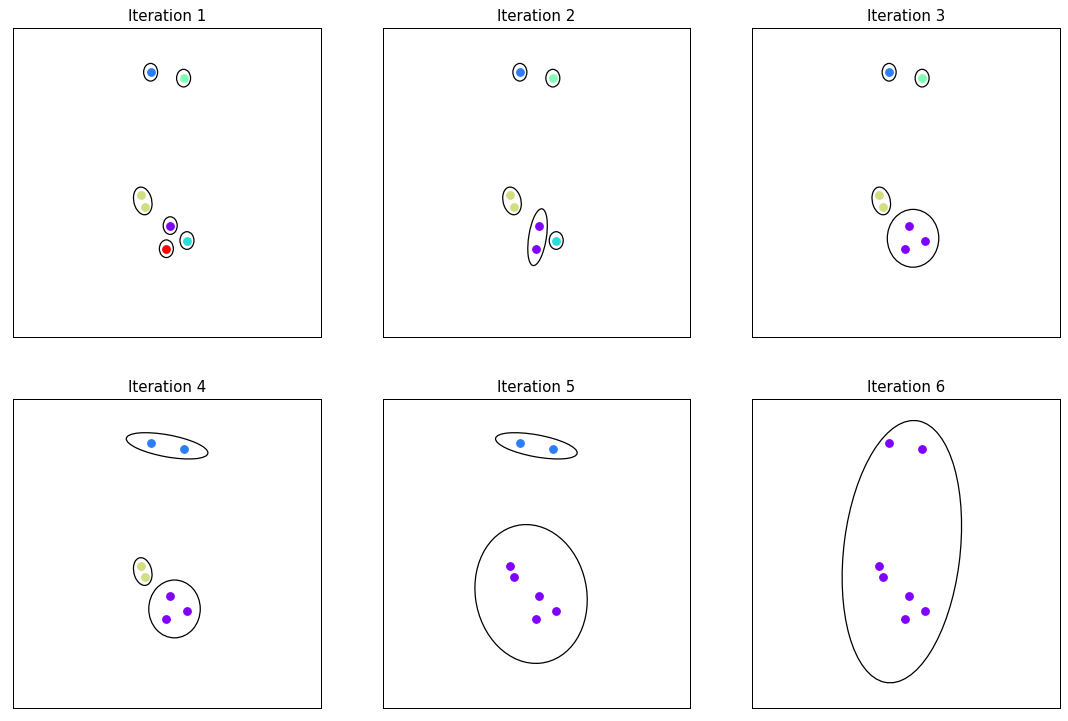

In [77]:
# Create data
X, y = make_blobs(n_samples=7, centers=3, n_features=2, random_state=50)
X = (X - np.min(X)) / (np.max(X) - np.min(X))
model = HierarchicalClustering()
model.fit(X)

NUM_CLUSTERS = len(model.all_clusters)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))


colours = cm.rainbow(np.linspace(0, 1, NUM_CLUSTERS))

iteration_num = 1

for row in range(2):
    for col in range(3):

        clusters = model.all_clusters[iteration_num]
        
        for key in clusters:
            points = clusters[key]
            
            # Cluster has multiple points
            if points.ndim > 1:
                x, y = clusters[key][:,0], clusters[key][:,1]
            
            # Cluster has single point
            else:
                x, y = clusters[key][0], clusters[key][1]
            
            # Plot clusters
            ax[row][col].set_title(f'Iteration {iteration_num}')
            ax[row][col].scatter(x, y, color=colours[key])

            ax[row][col].set_xlim(-0.8, 1.4)
            ax[row][col].set_ylim(-0.5, 1.25)

            ax[row][col].set_xticks([])
            ax[row][col].set_yticks([])

            width, height, angle = model.get_ellipse_params(points)
            cir = patches.Ellipse(xy = [np.mean(x), np.mean(y)],
                                width = width,
                                height = height,
                                angle = angle,
                                fill = False)
            ax[row][col].add_patch(cir)

        iteration_num += 1
        

### 2.8 - Experiments with Toy Datasets

The next few cells test the model using toy datasets generated using the `sklearn.datasets` module. These datasets include *blobs*, *circles* and *moons*. The blobs are distinct groups of isotropic points generated using a Gaussian two-dimensional distribution, and representative of points typically associated with simple clustering tasks. These act as a benchmark to test the model works. The circle dataset consists of two concentric rings. These are used to test the difference between the linkage metrics on a non-convex clustering problem. Finally the moons dataset consists of another set of non-convex clusters, further testing the model. This type of clustering problem can be expected to cause the model to fail, as this type of data is best suited to density-based clustering techniques such as DBSCAN. All the datasets are tested using the each of the linkage metrics to assess their performance against the data, as well as each other. A plotting function has been defined below to aid visualise the results of these tests.

In [78]:
def plot(models):
    fig, ax = plt.subplots(ncols=len(models), figsize=(5*len(models), 5))
    colours = ['red', 'blue', 'green']
    for m, model in enumerate(models):
        for i, cluster in enumerate(model.clusters):
            x = model.clusters[cluster][:, 0]
            y = model.clusters[cluster][:, 1]
            ax[m].set_title(f'\n{model.linkage_name.title()} Linkage\n')
            ax[m].scatter(x, y, c=colours[i], label=f'Cluster {i+1}')
        ax[m].legend(loc='upper right')

### 2.9 - The Blob Dataset

The blob dataset consists of 3 distinct groups of **isotropic** points (equal variance in all directions), using a two-dimensional Normal distribution. As expected for a simple clustering problem, the model performs well for all linkage metrics, correctly clustering the distinct groups.

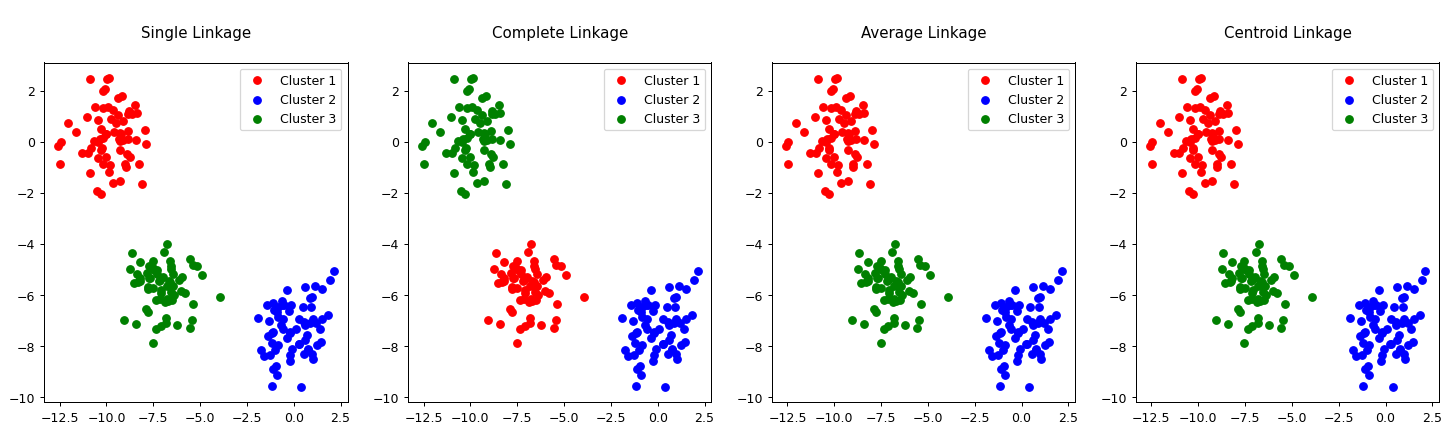

In [79]:
# Create data
blob_data = make_blobs(n_samples=200, random_state=9)[0]

# Train models
blob_single_model = HierarchicalClustering(n_clusters=3, linkage='single')
blob_single_model.fit(blob_data)

blob_complete_model = HierarchicalClustering(n_clusters=3, linkage='complete')
blob_complete_model.fit(blob_data)

blob_average_model = HierarchicalClustering(n_clusters=3, linkage='average')
blob_average_model.fit(blob_data)

blob_centroid_model = HierarchicalClustering(n_clusters=3, linkage='centroid')
blob_centroid_model.fit(blob_data)

# Plot models
models = [blob_single_model, blob_complete_model, blob_average_model, blob_centroid_model]
plot(models)

### 2.10 - The Circle Dataset

The circle data presents a simple non-convex cluster problem, and features one cluster enclosed completely inside of another. This type of problem cannot be correctly clustered using centroid-based techniques, and so k-means is not an appropriate choice of model for this kind of data. For the same reason, the centroid linkage metric of agglomerative clustering will also perform poorly. In fact, the graphs below show that the only linkage metric capable of solving a problem such as this is the single linkage metric. This is because only the closest points are merged together, and so the points in the inner and outer circles merge into their own clusters.

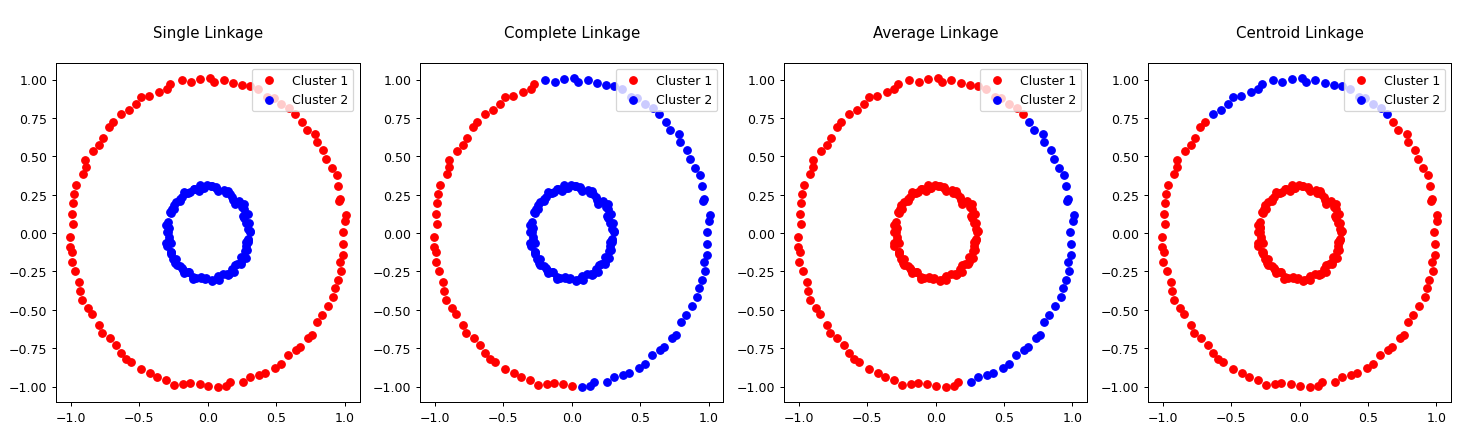

In [83]:
# Create data
from sklearn.datasets import make_circles
circle_data = make_circles(n_samples=200, factor=0.3, noise=0.01)[0]

# Train models
circle_single_model = HierarchicalClustering(n_clusters=2, linkage='single')
circle_single_model.fit(circle_data)

circle_complete_model = HierarchicalClustering(n_clusters=2, linkage='complete')
circle_complete_model.fit(circle_data)

circle_average_model = HierarchicalClustering(n_clusters=2, linkage='average')
circle_average_model.fit(circle_data)

circle_centroid_model = HierarchicalClustering(n_clusters=2, linkage='centroid')
circle_centroid_model.fit(circle_data)

# Plot models
models = [circle_single_model, circle_complete_model, circle_average_model, circle_centroid_model]
plot(models)

### 2.11 - The Moon Dataset

The moons dataset consists of more complex non-convex clusters compared to the concentric circle dataset. This data presents an issue for non density-based clustering techniques such as hierarchical clustering. As shown below, the model fails to correctly cluster the points regardless of the linkage metric. Datasets like this require other clustering models, for example a density-based model such as DBSCAN and OPTICS.

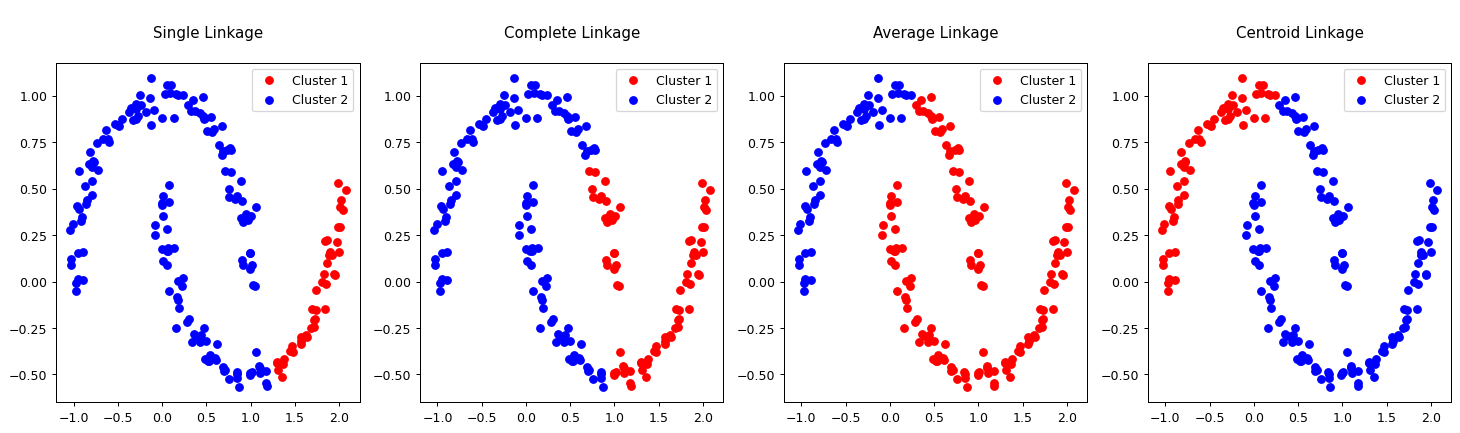

In [81]:
# Create data
from sklearn.datasets import make_moons
moon_data = make_moons(200, noise=0.05)[0]

# Train models
moon_single_model = HierarchicalClustering(n_clusters=2, linkage='single')
moon_single_model.fit(moon_data)

moon_complete_model = HierarchicalClustering(n_clusters=2, linkage='complete')
moon_complete_model.fit(moon_data)

moon_average_model = HierarchicalClustering(n_clusters=2, linkage='average')
moon_average_model.fit(moon_data)

moon_centroid_model = HierarchicalClustering(n_clusters=2, linkage='centroid')
moon_centroid_model.fit(moon_data)

# Plot models
models = [moon_single_model, moon_complete_model, moon_average_model, moon_centroid_model]
plot(models)

<h2 align="center">Section 3 - Dendrogram</h2>

### 3.1 - Visualising Hierarchies with Dendrograms 

Dendrograms can be used to visualise the hierarchical structure of the clusters created by an agglomerative clustering algorithm. First a number is assigned to each point in the dataset, identifying each of the initial clusters. Next, the two most similar clusters are merged, which is represented by the joining of two vertical lines up from the cluster numbers. The next two most similar clusters are then joined, with the height of the join above the previous to show this merged occurred after. The points are joined in this fashion until all the final clusters are presented or all the points have been merged into a single root. In the evolutionary biology example, this type of graph can be used to represent the relationships between species for classification in taxonomy.

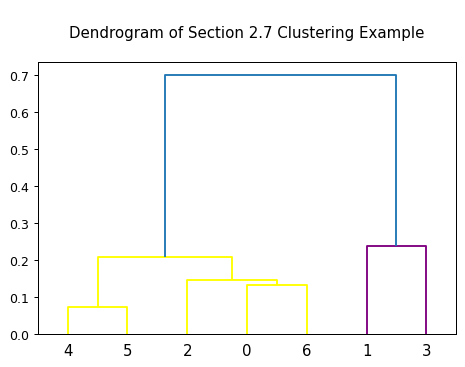

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette

X, y = make_blobs(n_samples=7, centers=3, n_features=2, random_state=50)
X = (X - np.min(X)) / (np.max(X) - np.min(X))

Z = linkage(X, 'single')
set_link_color_palette(['yellow', 'purple', 'blue'])

plt.figure()
plt.title('\nDendrogram of Section 2.7 Clustering Example\n')
dn = dendrogram(Z)

<h2 align="center">Section 4 - SciKit Learn Implementation</h2>

### 4.1 - The SciKit Learn `AgglomerativeClustering` Model

SciKit Learn has an implementation of hierarchical agglomerative clustering using a class called `AgglomerativeClustering`. This is built in a similar way to the implementation written in this notebook, having both a `linkage` parameter and `fit` method. The SciKit Learn model also correctly clusters the concentric circle data using the single linkage metric, and fails with all the other metrics.

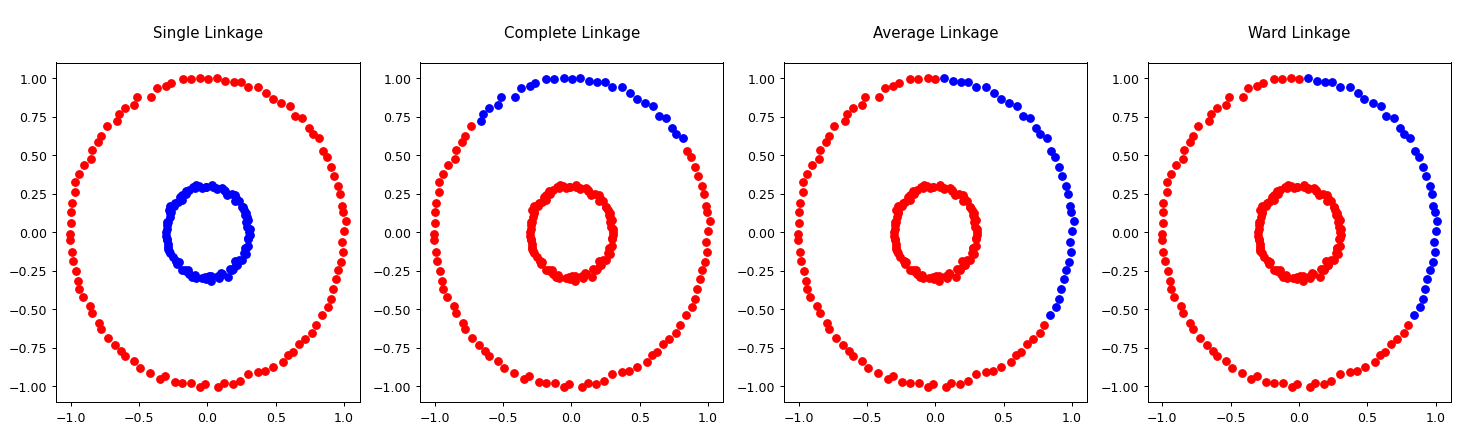

In [92]:
from sklearn.cluster import AgglomerativeClustering

# Create data
circle_data = make_circles(n_samples=200, factor=0.3, noise=0.01)[0]

# Train models
scikit_single_model = AgglomerativeClustering(linkage='single')
scikit_single_model.fit(circle_data)

scikit_complete_model = AgglomerativeClustering(linkage='complete')
scikit_complete_model.fit(circle_data)

scikit_average_model = AgglomerativeClustering(linkage='average')
scikit_average_model.fit(circle_data)

scikit_ward_model = AgglomerativeClustering(linkage='ward')
scikit_ward_model.fit(circle_data)

# Plot models
models = [scikit_single_model, scikit_complete_model, scikit_average_model, scikit_ward_model]

fig, ax = plt.subplots(ncols=len(models), figsize=(5*len(models), 5))
colours = ['red', 'blue']
linkages = ['Single', 'Complete', 'Average', 'Ward']
for m, model in enumerate(models):
    for i, point in enumerate(circle_data):
        ax[m].scatter(point[0], point[1], c=colours[model.labels_[i]])
    ax[m].set_title(f'\n{linkages[m]} Linkage\n')

<h2 align="center">Section 5 - Conclusion</h2>

Hierarchical Agglomerative Clustering is a useful technique for clustering data if the connections between points are important, e.g. in taxonomy. The method is deterministic and so the same results will be generated each time the algorithm is run, unlike non-deterministic methods such as k-means. The choice of linkage metric is an important hyperparameter, and should be chosen carefully based on the application. For example, when working with non-convex data, the single linkage metric may be the most appropriate choice. However, for many non-convex datasets even the single linkage may fail to correctly cluster the data, and so a density-based method such as DBSCAN should be considered instead.

<h2 align="center">Section 6 - Glossary</h2>

**Agglomerative Clustering**
> A clustering technique in which all the data points are initially considered to belong to their own individual cluster (leaves), which are then iteratively combined using some linkage metric until the desired number of clusters is formed.

**Dendrogram**
> A graphical representation of the hierarchical structure relating clusters based on their similarity to each other.

**Divisive Clustering**
> A clustering technique in which all the data points are initially grouped in a single cluster (root) which is then iteratively split using some criterion (e.g. Ward's) until the desired number of clusters is formed.

**Flat**
> A clustering output without an underlying structure defining how the clusters relate to each other in terms of similarity.

**Hierarchical**
> An underlying structure between clusters which defines how the clusters relate to each other in terms of similarity.

**Isotropic**
> A cluster with equal variance in all directions

**Leaf**
> A single data point in a hierarchical clustering model.

**Linkage Metric**
> A measure defining the similarity between two clusters based on some calculation of the distances between their centroids or an aggregate function of the pairwise distances between the points in each cluster.

**Node**
> A group of leaves forming a cluster.

**Root**
> A single cluster containing all the data points (leaves) in a hierarchical clustering model.


<h2 align="center">Section 7 - Further Reading</h2>

[1] Agglomerative vs Divisive Clustering [Towards Data Science](https://towardsdatascience.com/hierarchical-clustering-agglomerative-and-divisive-explained-342e6b20d710#:~:text=Divisive%20Clustering%3A,one%20moves%20down%20the%20hierarchy.)

[2] Agglomerative Clustering Algorithm [Data Novia](https://www.datanovia.com/en/lessons/agglomerative-hierarchical-clustering/)

[] SciKit Learn's `AgglomerativeClustering` Implementation [SciKit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html?highlight=agglomerative#sklearn.cluster.AgglomerativeClustering)